El linfoma maligno es un cáncer que afecta a los ganglios linfáticos. 
Tres tipos de linfoma maligno están representados en el conjunto:

    * CLL (leucemia linfocítica crónica).
    * FL (linfoma folicular).
    * MCL (linfoma de células del manto).
    
La capacidad de distinguir las clases de linfoma de las biopsias seccionadas y teñidas con hematoxilina/eosina (H+E) permitiría un diagnóstico más consistente y menos exigente de esta enfermedad. Sólo los patólogos más expertos especializados en estos tipos de linfomas son capaces de clasificar de forma consistente y precisa estos tres tipos de linfoma a partir de biopsias teñidas con H+E. La práctica estándar consiste en utilizar sondas específicas para cada clase para distinguirlas de forma fiable.

Este conjunto de datos es una colección de muestras preparadas por diferentes patólogos en diferentes lugares. Existe un gran grado de variación en la tinción que normalmente se esperaría de tales muestras.


---

Malignant lymphoma is a cancer affecting lymph nodes. 
Three types of malignant lymphoma are represented in the set:

    * CLL (chronic lymphocytic leukemia).
    * FL (follicular lymphoma).
    * MCL (mantle cell lymphoma).
    
The ability to distinguish classes of lymphoma from biopsies sectioned and stained with Hematoxylin/Eosin (H+E) would allow for more consistent and less demanding diagnosis of this disease. Only the most expert pathologists specializing in these types of lymphomas are able to consistently and accurately classify these three lymphoma types from H+E-stained biopsies. The standard practice is to use class-specific probes in order to distinguish these classes reliably.

This dataset is a collection of samples prepared by different pathologists at different sites. There is a large degree of staining variation that one would normally expect from such samples.

---

In [5]:
from sklearn.model_selection import train_test_split
from rasterio.plot import show, show_hist
import matplotlib.pyplot as plt
import rasterio
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Establecemos una semilla para numpy y tensorflow para poder reproducir la ejecución y los resultados
SEED = 1000
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install tensorflow_io

In [3]:
import tensorflow as tf
import tensorflow_io as tfio

tf.random.set_seed(SEED)
tf.__version__

'2.2.0'

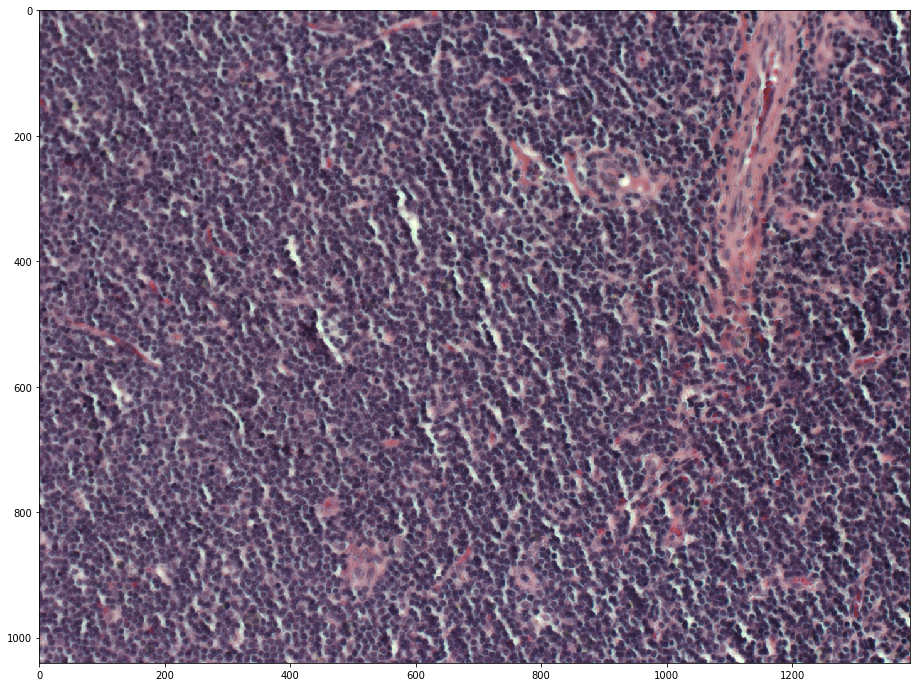

In [8]:
src = rasterio.open("data/CLL/sj-03-476_001.tif")

fig, ax = plt.subplots(1, figsize=(20, 12))
show(src, ax=ax);

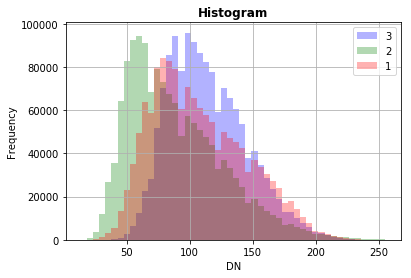

In [9]:
show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

# Conversion de los ficheros .tif en .jpg para procesarlas con tensorflow

In [ ]:
#for root, dirs, files in os.walk('data/MCL'):
#    for name in files:
#        outfile = os.path.splitext(name)[0] + ".jpg"
#        im = Image.open(os.path.join(root, name))
#        print("Generating jpeg for %s" % name)
#        im.thumbnail(im.size)
#        im.save(outfile, "JPEG", quality=100)

# Chronic lymphocytic leukemia

In [ ]:
for root, dirs, files in os.walk('data/CLL'):
    for i in range(5):
        fig, ax = pyplot.subplots(1, figsize=(20, 12))
        show(rasterio.open(f"data/CLL/{files[i]}"), ax=ax, title=f'CLL - {files[i]}');

# Follicular lymphoma

In [ ]:
for root, dirs, files in os.walk('data/FL'):
    for i in range(5):
        fig, ax = pyplot.subplots(1, figsize=(20, 12))
        show(rasterio.open(f"data/FL/{files[i]}"), ax=ax, title=f'FL - {files[i]}');

# Mantle cell lymphoma

In [ ]:
for root, dirs, files in os.walk('data/MCL'):
    for i in range(5):
        fig, ax = pyplot.subplots(1, figsize=(20, 12))
        show(rasterio.open(f"data/MCL/{files[i]}"), ax=ax, title=f'MCL - {files[i]}');

---

In [10]:
# obtenemos el nombre de las etiquetas
df = pd.DataFrame()
for root, dirs, files in os.walk('data/CLL_jpg'):
    df_aux = pd.DataFrame(files, columns=['file'])
    df_aux['file'] = df_aux['file'].apply(lambda f: 'data/CLL_jpg/'+f)
    df_aux['labels'] = 'CLL'
    df_aux['lab_idx'] = 0
    df = pd.concat([df, df_aux], ignore_index=True)
    
for root, dirs, files in os.walk('data/FL_jpg'):
    df_aux = pd.DataFrame(files, columns=['file'])
    df_aux['file'] = df_aux['file'].apply(lambda f: 'data/FL_jpg/'+f)
    df_aux['labels'] = 'FL'
    df_aux['lab_idx'] = 1
    df = pd.concat([df, df_aux], ignore_index=True)

for root, dirs, files in os.walk('data/MCL_jpg'):
    df_aux = pd.DataFrame(files, columns=['file'])
    df_aux['file'] = df_aux['file'].apply(lambda f: 'data/MCL_jpg/'+f)
    df_aux['labels'] = 'MCL'
    df_aux['lab_idx'] = 2
    df = pd.concat([df, df_aux], ignore_index=True)
    
#Desordenamos el conjunto de datos    
df = df.sample(frac=1, random_state=10)

In [11]:
df.head(10)

file labels  lab_idx
236   data/FL_jpg/sj-05-6124-R4_003.jpg     FL        1
274   data/MCL_jpg/sj-05-901-R1_001.jpg    MCL        2
257     data/MCL_jpg/sj-05-1374_004.jpg    MCL        2
298  data/MCL_jpg/sj-04-3077-R2_005.jpg    MCL        2
228   data/FL_jpg/sj-05-1881-R1_007.jpg     FL        1
192   data/FL_jpg/sj-05-5389-R1_014.jpg     FL        1
166    data/FL_jpg/sj-05-894-R3_001.jpg     FL        1
263      data/MCL_jpg/sj-05-768_010.jpg    MCL        2
76    data/CLL_jpg/sj-03-852-R2_004.jpg    CLL        0
170   data/FL_jpg/sj-05-5389-R1_016.jpg     FL        1

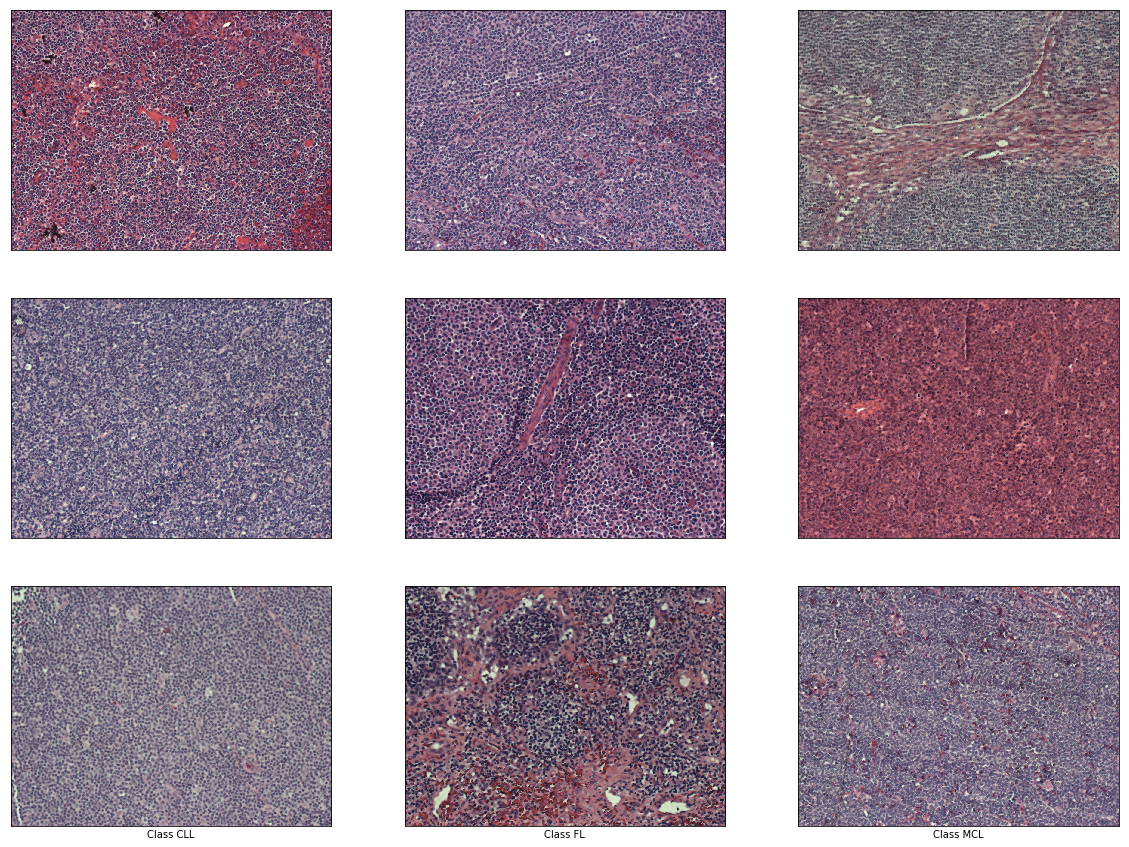

In [12]:
# Mostramos 3 imágenes de cada clase.
plot_n_images = 3
num_labels = 3
style_labels = ['CLL', 'FL', 'MCL']
fig = plt.figure(figsize=(20, 15))

np.random.seed(1000)
for i in range(0,num_labels):
    select_frame = df[df['lab_idx']==i]
    for j in range(0,plot_n_images):
        aux_index = np.random.choice(select_frame.index)
        fig_i=fig.add_subplot(plot_n_images,num_labels,j*num_labels+i+1)
        fig_i.imshow(plt.imread(df['file'][aux_index]))
        
        fig_i.set_xticks(())
        fig_i.set_yticks(())
        
    fig_i.set_xlabel('Class %s' % style_labels[i])

In [13]:
train_frame, valid_frame = train_test_split(
    df, test_size=0.2, random_state=SEED, stratify=df['labels'])

train_frame, test_frame = train_test_split(
    train_frame, test_size=0.2, random_state=SEED, stratify=train_frame['labels'])

Train


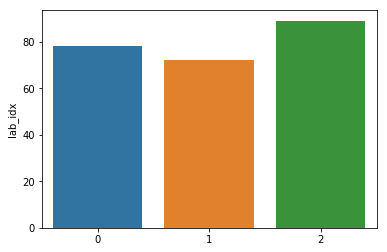

Test


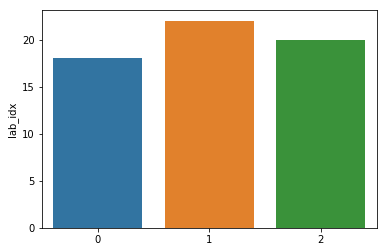

Validacion


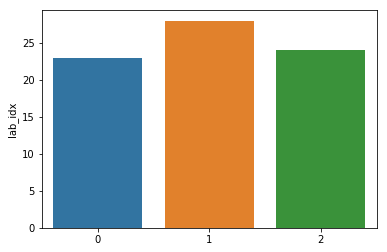

In [14]:
print('Train')
sns.barplot(train_frame['lab_idx'].unique(), train_frame['lab_idx'].value_counts())
plt.show()
print('Test')
sns.barplot(test_frame['lab_idx'].unique(), test_frame['lab_idx'].value_counts())
plt.show()
print('Validacion')
sns.barplot(valid_frame['lab_idx'].unique(), valid_frame['lab_idx'].value_counts())
plt.show()

## <font color="#004D7F">Cargando una red pre-entrenada</font>

In [15]:
model = tf.keras.applications.mobilenet.MobileNet(weights='imagenet') 

In [16]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [17]:
def read_image(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    #importante: esto ya no es necesario, se hace en el prep_func
    #img /= 255.0
    return img, label

def resize_image(img, label, target_size, aspect_ratio=True):
    if aspect_ratio:
        resized_img = tf.image.resize_with_pad(img, target_size[0], target_size[1])
    else:
        resized_img = tf.image.resize(img, target_size)
    return resized_img, label

def get_dataset(image_paths, image_labels, target_size, batch_size, prep_func):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
    
    dataset = dataset.map(read_image)
    dataset = dataset.map(lambda x, y: resize_image(x, y, target_size, aspect_ratio=False))
    dataset = dataset.map(lambda x, y: (prep_func(x), y))
    
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(1)
    
    return dataset

In [29]:
target_size = (224, 224)
batch_size = 32
epochs = 20

# Generamos el dataset de train
train_dataset = get_dataset(train_frame['file'], train_frame['lab_idx'], target_size, batch_size, 
                            tf.keras.applications.mobilenet.preprocess_input)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

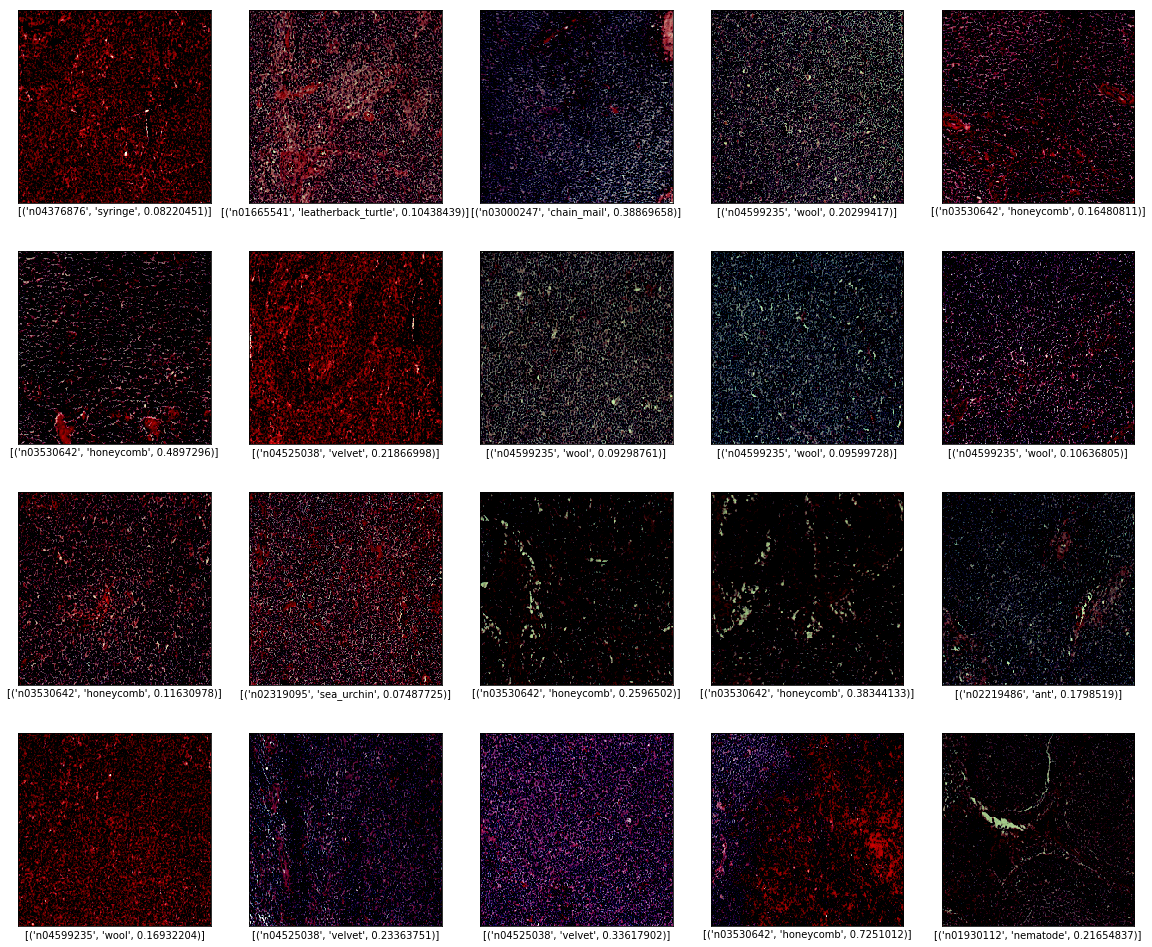

In [19]:
# accedemos al primer batch y nos quedamos solo con las imágenes
for i in train_dataset.as_numpy_iterator():
    train_images = i[0]
    break

# realizamos las predicciones
preds = model.predict(train_images)
pred_labels = tf.keras.applications.mobilenet.decode_predictions(preds, top=1)

# Mostramos las 20 imágenes del batch y las etiquetas asignadas por MobileNet.
plot_n_images = 20
fig = plt.figure(figsize=(20, 17))

for i in range(0,5):
    for j in range(0,4):
        counter = i*4+j
        fig_i=fig.add_subplot(4,5,counter+1)
        fig_i.imshow(train_images[counter])

        fig_i.set_xticks(())
        fig_i.set_yticks(())
        
        fig_i.set_xlabel('%s' % pred_labels[counter])

# Generacion del modelo con finetunning

In [20]:
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), alpha=1, include_top=False, 
                                                       pooling='avg', weights='imagenet')

# y congelamos el entrenamiento en todas las capas
for layer in base_model.layers:
    layer.trainable = False

In [21]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [22]:
x = tf.keras.layers.Dropout(0.75)(base_model.output)
x = tf.keras.layers.Dense(5, activation='softmax', name='flickr_out')(x)

model = tf.keras.Model(base_model.input, x)

In [30]:
train_dataset = get_dataset(train_frame['file'], train_frame['lab_idx'], target_size, batch_size, 
                            tf.keras.applications.mobilenet.preprocess_input)

valid_dataset = get_dataset(valid_frame['file'], valid_frame['lab_idx'], target_size, batch_size, 
                            tf.keras.applications.mobilenet.preprocess_input)

test_dataset = get_dataset(test_frame['file'], test_frame['lab_idx'], target_size, batch_size, 
                            tf.keras.applications.mobilenet.preprocess_input)

In [31]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=sgd, metrics=['acc'])

history = model.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)

Epoch 1/20
8/8 [==============================] - 10s 1s/step - loss: 1.0484 - acc: 0.4854 - val_loss: 0.8600 - val_acc: 0.6133
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.9352 - acc: 0.5690 - val_loss: 0.8595 - val_acc: 0.6267
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 1.0141 - acc: 0.5063 - val_loss: 0.8431 - val_acc: 0.6533
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 1.0074 - acc: 0.5105 - val_loss: 0.8496 - val_acc: 0.6533
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: 0.9689 - acc: 0.5481 - val_loss: 0.8546 - val_acc: 0.6400
Epoch 6/20
8/8 [==============================] - 9s 1s/step - loss: 1.0454 - acc: 0.5063 - val_loss: 0.8432 - val_acc: 0.6533
Epoch 7/20
8/8 [==============================] - 9s 1s/step - loss: 0.8681 - acc: 0.5858 - val_loss: 0.8493 - val_acc: 0.6400
Epoch 8/20
8/8 [==============================] - 9s 1s/step - loss: 0.9922 - acc: 0.5439 - val_loss: 0.8314 -

In [32]:
score = model.evaluate(valid_dataset)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))
score = model.evaluate(test_dataset)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

3/3 [==============================] - 1s 434ms/step - loss: 0.8034 - acc: 0.6800
loss en validación: 0.8034383058547974 
accuracy en validación: 0.6800000071525574
2/2 [==============================] - 1s 439ms/step - loss: 0.8333 - acc: 0.6333
loss en test: 0.8332604765892029 
accuracy en test: 0.6333333253860474


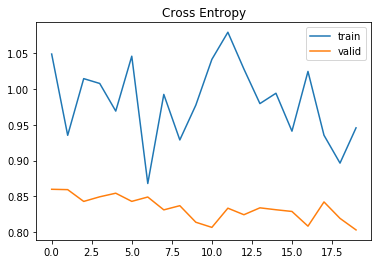

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

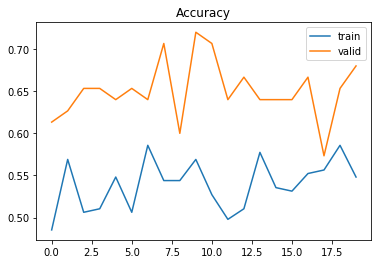

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

# Modelo tradicional con red neuronal preconfigurada

In [39]:
# cargamos el modelo base
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet')

# creamos un nuevo objeto Model que tenga el mismo input que el modelo base, y 
# de output la capa que queramos, en este caso, fc2
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

553467904/553467096 [==============================] - 112s 0us/step


In [41]:
target_size = (224, 224)
batch_size = 32
epochs = 5

# TODO: Generar datasets de train y validacion
train_dataset = get_dataset(train_frame['file'], train_frame['labels'], target_size, batch_size, 
                            tf.keras.applications.vgg16.preprocess_input)

valid_dataset = get_dataset(valid_frame['file'], valid_frame['labels'], target_size, batch_size, 
                            tf.keras.applications.vgg16.preprocess_input)

test_dataset = get_dataset(test_frame['file'], test_frame['labels'], target_size, batch_size, 
                            tf.keras.applications.vgg16.preprocess_input)

In [42]:
# luego solo deberemos llamar a predict con nuestro iterador en cada caso
x_fc2_train = model.predict(train_dataset)
y_train = train_frame['labels']

x_fc2_valid = model.predict(valid_dataset)
y_valid = valid_frame['labels']

x_fc2_test = model.predict(test_dataset)
y_test = test_frame['labels']

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_fc2_train, y_train)

# para obtener el accuracy mirar 'sklearn.metrics.accuracy_score'
# comparamos estos datos con la función accuracy
print('Accuracy en valid:')
print(accuracy_score(y_valid, rf.predict(x_fc2_valid)))
print('Accuracy en test:')
print(accuracy_score(y_test, rf.predict(x_fc2_test)))

Accuracy en valid:
0.72
Accuracy en test:
0.6333333333333333
